In [2]:
using NGSIM
using AutomotiveDrivingModels
include(Pkg.dir("AutomotiveDrivingModels", "src", "viz", "AutoViz.jl"))
using AutoViz
using Interact

INFO: Precompiling module NGSIM...


In [14]:
# Testing the EKF function (from trajectory_smoothing.jl) - choosing random number to test
x = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0]
μ = x;
σ = 1e-1                                                        # covariance on states (parameter)
Σ = diagm([σ*0.01, σ*0.01, σ*0.1, σ, 10.0*σ, 10.0*σ])           # covariance matrix of states
u = [10.0,5.0]
ν = VehicleSystem()
z = NGSIM.observe(ν, x)
μ, Σ = NGSIM.EKF(ν, μ, Σ, u, z)

([2.563459855026411,3.1330047179156364,3.9999904743508563,5.601653033449561,5.000002369175248,6.000000055936017],
6x6 Array{Float64,2}:
  0.00336335   -0.000438395   0.00324022   …   0.000127642  -4.20375e-7 
 -0.000438395   0.00409966   -0.00433076      -0.000211045  -2.4423e-7  
  0.00324022   -0.00433076    0.014699         0.00099992    1.82305e-11
 -0.00933872   -0.0114735    -1.16381e-6      -7.36384e-8    9.9996e-6  
  0.000127642  -0.000211045   0.00099992       0.78          1.26575e-13
 -4.20375e-7   -2.4423e-7     1.82305e-11  …   1.26575e-13   0.7701     )

In [15]:
# generate raw data data structure
filepath = Pkg.dir("NGSIM", "data", "i101_trajectories-0750am-0805am.txt")
roadway = startswith("i101_trajectories-0750am-0805am.txt", "i101") ? ROADWAY_101 : ROADWAY_80;
trajdata = NGSIM.NGSIMTrajdata(filepath, roadway);

In [16]:
# prepare data to pass through EKF
ftr = NGSIM.FilterTrajectoryResult(trajdata,2);

In [17]:
# Pass through EKF
ftr = NGSIM.filter_trajectory!(ftr, ν);

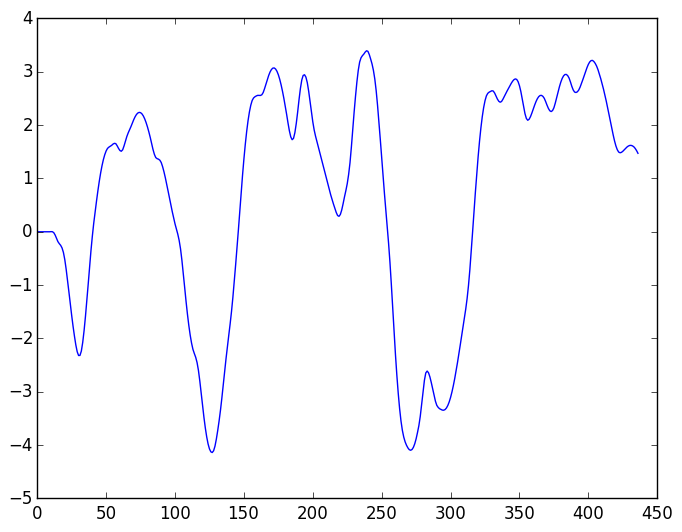

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x3155333d0>

In [18]:
using PyPlot
# ftr.ω_arr
plot(ftr.a_arr)